In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation

import datetime

In [17]:
data = pd.read_csv('ETH_1218M - ETH_1218M.csv')
data.head()

,date,Open,High,Low,Close,Adj Close,Volume
0,2020. 5. 6,252331,259798,250874,250893,24860826926561,27634989198134
1,2020. 5. 7,250717,261147,248013,258908,29010446396147,28929589122890
2,2020. 5. 8,258797,263079,254709,259807,24934891958976,28794432944335
3,2020. 5. 9,259991,261939,255025,258110,23115877900530,28614499669991
4,2020. 5. 10,258051,258051,222871,230035,30753079420016,25507310472928


In [18]:
# deeprunning mid price
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices)/2

#create windows

In [45]:
# window 사이즈 아래는 50을 기준으로 잡고, 50 + 1로 하나씩 늘려간다.
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [46]:
#데이터 정규화
normalized_data = []
for window in result:
    normalized_window = [((float(p)/float(window[0]))-1) for p in window]
    normalized_data.append(normalized_window)

#데이터 정규화 시 null값들은 전부 정리
result = np.array(normalized_data)

#split train and test data

#training data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((645, 50, 1), (72, 50, 1))

In [54]:
#Build a Model
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50,1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_21 (LSTM)              (None, 64)                29440     
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=100)

Epoch 1/100
65/65 [==============================] - 1s 21ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 2/100
65/65 [==============================] - 1s 21ms/step - loss: 0.0036 - val_loss: 0.0028
Epoch 3/100
65/65 [==============================] - 1s 21ms/step - loss: 0.0038 - val_loss: 0.0011
Epoch 4/100
65/65 [==============================] - 1s 21ms/step - loss: 0.0037 - val_loss: 0.0012
Epoch 5/100
65/65 [==============================] - 1s 21ms/step - loss: 0.0041 - val_loss: 7.4784e-04
Epoch 6/100
65/65 [==============================] - 1s 21ms/step - loss: 0.0038 - val_loss: 6.5940e-04
Epoch 7/100
65/65 [==============================] - 1s 21ms/step - loss: 0.0036 - val_loss: 8.5954e-04
Epoch 8/100
65/65 [==============================] - 1s 21ms/step - loss: 0.0036 - val_loss: 8.4955e-04
Epoch 9/100
65/65 [==============================] - 1s 20ms/step - loss: 0.0037 - val_loss: 6.9035e-04
Epoch 10/100
65/65 [==============================] - 1s 20ms/step - loss: 0.003

65/65 [==============================] - 1s 20ms/step - loss: 0.0028 - val_loss: 0.0011
Epoch 81/100
65/65 [==============================] - 1s 20ms/step - loss: 0.0028 - val_loss: 8.9886e-04
Epoch 82/100
65/65 [==============================] - 1s 20ms/step - loss: 0.0028 - val_loss: 7.4160e-04
Epoch 83/100
65/65 [==============================] - 1s 20ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 84/100
65/65 [==============================] - 1s 20ms/step - loss: 0.0028 - val_loss: 6.9355e-04
Epoch 85/100
65/65 [==============================] - 1s 20ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 86/100
65/65 [==============================] - 1s 20ms/step - loss: 0.0027 - val_loss: 8.0131e-04
Epoch 87/100
65/65 [==============================] - 1s 20ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 88/100
65/65 [==============================] - 1s 20ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 89/100
65/65 [==============================] - 1s 20ms/step - loss: 0.0026 - val_

3/3 [==============================] - 1s 7ms/step


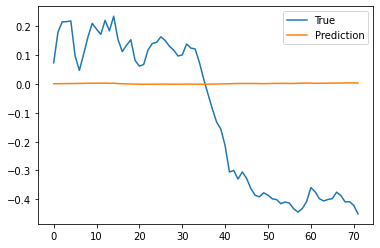

In [55]:
#prediction
pred = model.predict(x_test)

fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()